In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'D:/train'
TEST_DIR = 'D:/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                         image     label
0         D:/train\angry\Training_10118481.jpg     angry
1         D:/train\angry\Training_10120469.jpg     angry
2         D:/train\angry\Training_10131352.jpg     angry
3         D:/train\angry\Training_10161559.jpg     angry
4          D:/train\angry\Training_1021836.jpg     angry
...                                        ...       ...
28704  D:/train\surprise\Training_99916297.jpg  surprise
28705  D:/train\surprise\Training_99924420.jpg  surprise
28706  D:/train\surprise\Training_99937001.jpg  surprise
28707  D:/train\surprise\Training_99951755.jpg  surprise
28708  D:/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                         image     label
0       D:/test\angry\PrivateTest_10131363.jpg     angry
1       D:/test\angry\PrivateTest_10304478.jpg     angry
2        D:/test\angry\PrivateTest_1054527.jpg     angry
3       D:/test\angry\PrivateTest_10590091.jpg     angry
4        D:/test\angry\PrivateTest_1109992.jpg     angry
...                                        ...       ...
7173  D:/test\surprise\PublicTest_98089595.jpg  surprise
7174  D:/test\surprise\PublicTest_98567249.jpg  surprise
7175  D:/test\surprise\PublicTest_98972870.jpg  surprise
7176  D:/test\surprise\PublicTest_99242645.jpg  surprise
7177  D:/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         D:/test\angry\PrivateTest_10131363.jpg
1         D:/test\angry\PrivateTest_10304478.jpg
2          D:/test\angry\PrivateTest_1054527.jpg
3         D:/test\angry\PrivateTest_10590091.jpg
4          D:/test\angry\PrivateTest_1109992.jpg
                          ...                 

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

c:\Users\varni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [20]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test)) 

Epoch 1/10
225/225 [==============================] - 497s 2s/step - loss: 1.8172 - accuracy: 0.2488 - val_loss: 1.8145 - val_accuracy: 0.2531
Epoch 2/10
225/225 [==============================] - 536s 2s/step - loss: 1.7475 - accuracy: 0.2789 - val_loss: 1.6525 - val_accuracy: 0.3295
Epoch 3/10
225/225 [==============================] - 492s 2s/step - loss: 1.6091 - accuracy: 0.3626 - val_loss: 1.4590 - val_accuracy: 0.4429
Epoch 4/10
225/225 [==============================] - 511s 2s/step - loss: 1.4901 - accuracy: 0.4210 - val_loss: 1.3614 - val_accuracy: 0.4772
Epoch 5/10
225/225 [==============================] - 492s 2s/step - loss: 1.4229 - accuracy: 0.4516 - val_loss: 1.3314 - val_accuracy: 0.4901
Epoch 6/10
225/225 [==============================] - 470s 2s/step - loss: 1.3801 - accuracy: 0.4694 - val_loss: 1.2642 - val_accuracy: 0.5100
Epoch 7/10
225/225 [==============================] - 476s 2s/step - loss: 1.3365 - accuracy: 0.4863 - val_loss: 1.2362 - val_accuracy: 0.5240

In [21]:
model_json = model.to_json()
with open("emotionmodel.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotionmodel.h5")

In [22]:
from keras.models import model_from_json

In [23]:
json_file = open("emotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotionmodel.h5")

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [25]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [32]:
image = "C:/Users/varni/Desktop/5th sem mini project+ppt/train/fear/Training_308765.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of surprise
1/1 [==============================] - 0s 35ms/step
model prediction is  surprise


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of surprise
1/1 [==============================] - 0s 31ms/step
model prediction is  surprise


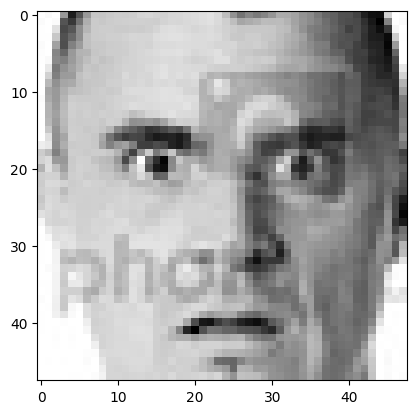

In [35]:
image = "C:/Users/varni/Desktop/5th sem mini project+ppt/train/fear/Training_308765.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 [==============================] - 0s 37ms/step
model prediction is  angry


c:\Users\varni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


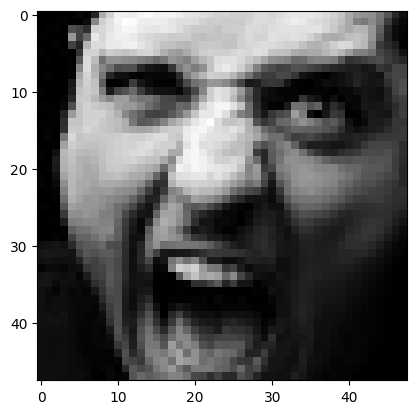

In [36]:
image = "C:/Users/varni/Desktop/5th sem mini project+ppt/train/angry/Training_267631.jpg"
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')